# Importing necessary libraries and functions

In [1]:
# Import the MNIST dataset from Keras
from keras.datasets import mnist

# Import the to_categorical function from Keras
# to convert the labels to one-hot encoded vectors
from keras.utils import to_categorical

# Import the Sequential class from Keras
from keras.models import Sequential

# Import the Dense class from Keras
# to add fully connected layers to the neural network
from keras.layers import Dense

# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Import the NumPy library for numerical operations
import numpy as np

# Load and preprocess the MNIST dataset using Python.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build a neural network using Python and NumPy with 
* Different activation functions i.e., sigmoid, ReLu and hyperbolic tangent (tanh) function on hidden layers and softmax on output layer. 
* Different sizes of hidden layers i.e., 32, 64, 128 and 256.  
* Use accuracy as evaluation metric. 


In [3]:
# Define the model architecture
def build_model(hidden_sizes, activation_functions):
    model = Sequential()
    for i in range(len(hidden_sizes)):
        if i == 0:
            model.add(Dense(hidden_sizes[i], activation=activation_functions[i], input_shape=(784,)))
        else:
            model.add(Dense(hidden_sizes[i], activation=activation_functions[i]))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model





# Train and evaluate the performance of the neural network. 
# Save the best performing network model using model.save() method. 

In [4]:
# Define the hyperparameters
hidden_sizes = [32, 64, 128, 256]
activation_functions = ['sigmoid', 'relu', 'tanh']

# Train and evaluate the model for each combination of hyperparameters
best_accuracy = 0
accuracies = np.zeros((len(hidden_sizes), len(activation_functions)))
for i, size in enumerate(hidden_sizes):
    for j, func in enumerate(activation_functions):
        model = build_model([size, size], [func, func])
        model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"Size: {size}, Activation Function: {func}, Test Accuracy: {accuracy}")
        accuracies[i, j] = accuracy
        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy

# Save the best model to disk
best_model.save("best_model.h5")


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.3225 - accuracy: 0.7210 - val_loss: 0.6349 - val_accuracy: 0.8717
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4752 - accuracy: 0.8898 - val_loss: 0.3673 - val_accuracy: 0.9047
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3273 - accuracy: 0.9126 - val_loss: 0.2867 - val_accuracy: 0.9206
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2650 - accuracy: 0.9273 - val_loss: 0.2430 - val_accuracy: 0.9313
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2262 - accuracy: 0.9376 - val_loss: 0.2148 - val_accuracy: 0.9397
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1984 - accuracy: 0.9442 - val_loss: 0.1921 - val_accuracy: 0.9453
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1767 - accuracy: 0.9501 - val_loss: 0.1779 - val_accuracy: 0.9489
Epoch 

# Compare and visualize the results of the neural network

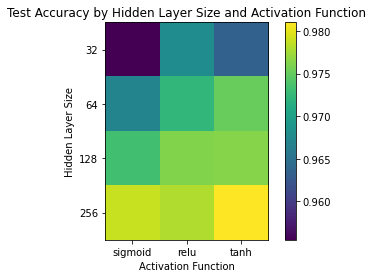

In [5]:
# Create a heatmap of the test accuracies
fig, ax = plt.subplots()
im = ax.imshow(accuracies, cmap='viridis')
ax.set_xticks(np.arange(len(activation_functions)))
ax.set_yticks(np.arange(len(hidden_sizes)))
ax.set_xticklabels(activation_functions)
ax.set_yticklabels(hidden_sizes)
ax.set_xlabel("Activation Function")
ax.set_ylabel("Hidden Layer Size")
ax.set_title("Test Accuracy by Hidden Layer Size and Activation Function")
plt.colorbar(im)
plt.show()